In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset (modify filename if needed)
df = pd.read_csv('/content/TASK-ML-INTERN.csv') # Ensure the file path is correct

# Display basic info
print("Dataset Overview:")
df.info()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [3]:
# Display the first 5 rows to get an initial sense of the data
print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [5]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
total_missing = missing_values.sum()

if total_missing > 0:
    print(missing_values[missing_values > 0])  # Show only columns with missing values
else:
    print("No missing values found.")

No missing values found.


In [59]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [7]:
# Check for duplicate rows in the dataset
duplicate_count = df.duplicated().sum()
print(f"Duplicate Rows Found: {duplicate_count}")

Duplicate Rows Found: 0


In [8]:
# Summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [9]:
# Drop the 'hsi_id' column as it may not contribute to the analysis

df.drop('hsi_id', axis = 1, inplace = True)

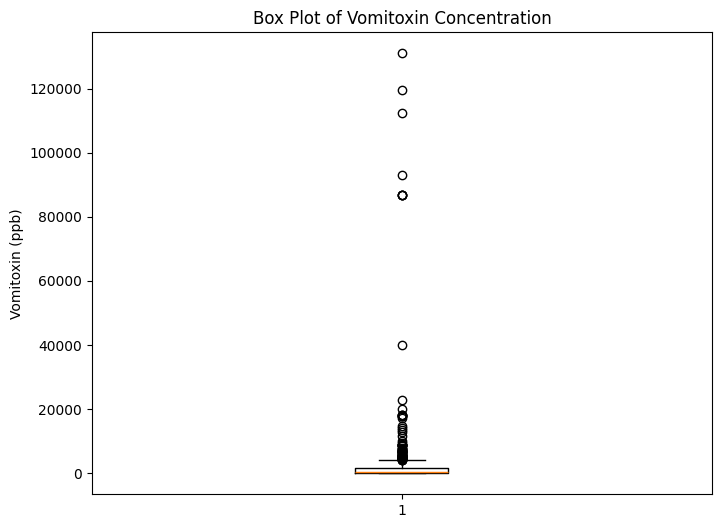

In [10]:
import matplotlib.pyplot as plt

# Analyze the distribution of 'vomitoxin_ppb' using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['vomitoxin_ppb'])
plt.ylabel('Vomitoxin (ppb)')
plt.title('Box Plot of Vomitoxin Concentration')
plt.show()

# Winsorize the 'vomitoxin_ppb' column at the 99th percentile
upper_limit = df['vomitoxin_ppb'].quantile(0.99)
df['vomitoxin_ppb'] = df['vomitoxin_ppb'].clip(upper=upper_limit)

Plot Type: Box Plot  
Description:  
This box plot represents the distribution of vomitoxin concentration in parts per billion (ppb).  
The majority of values are clustered at the lower end, but there are many outliers extending to very high values.  
The presence of extreme outliers suggests that vomitoxin levels vary significantly across samples.  
This helps in detecting potential anomalies in the data.

In [11]:
# Checking Skewness of Features
skewness = df.skew().sort_values(ascending=False)
print("\nSkewness of Features:")
print(skewness)


Skewness of Features:
vomitoxin_ppb    6.654388
434              0.202592
415              0.183025
97               0.181687
406              0.181151
                   ...   
14              -0.229112
17              -0.233108
2               -0.247102
1               -0.265949
0               -0.329651
Length: 449, dtype: float64


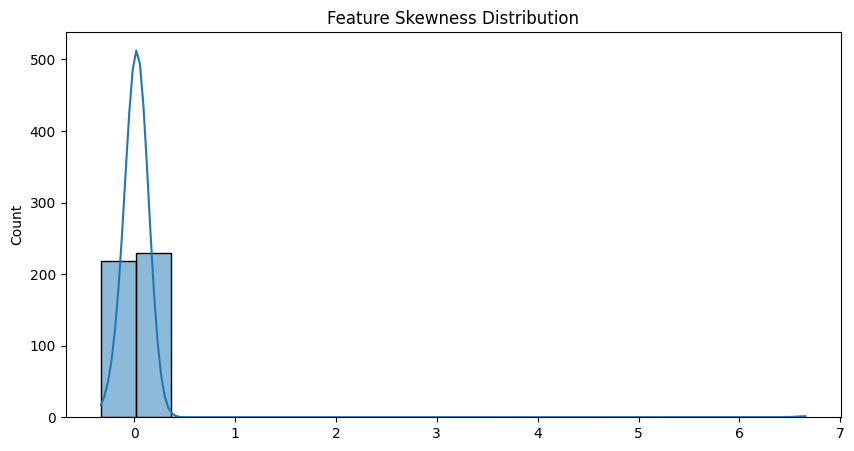

In [12]:
# Visualizing skewness
plt.figure(figsize=(10, 5))
sns.histplot(df.skew(), bins=20, kde=True)
plt.title("Feature Skewness Distribution")
plt.show()

Plot Type: Histogram with KDE  
Description:  
This plot shows the skewness distribution of features in the dataset.  
Most features have skewness values close to zero, indicating a relatively normal distribution.  
However, a few features have high skewness values, suggesting that transformations (e.g., log or Box-Cox) may be required to normalize them.

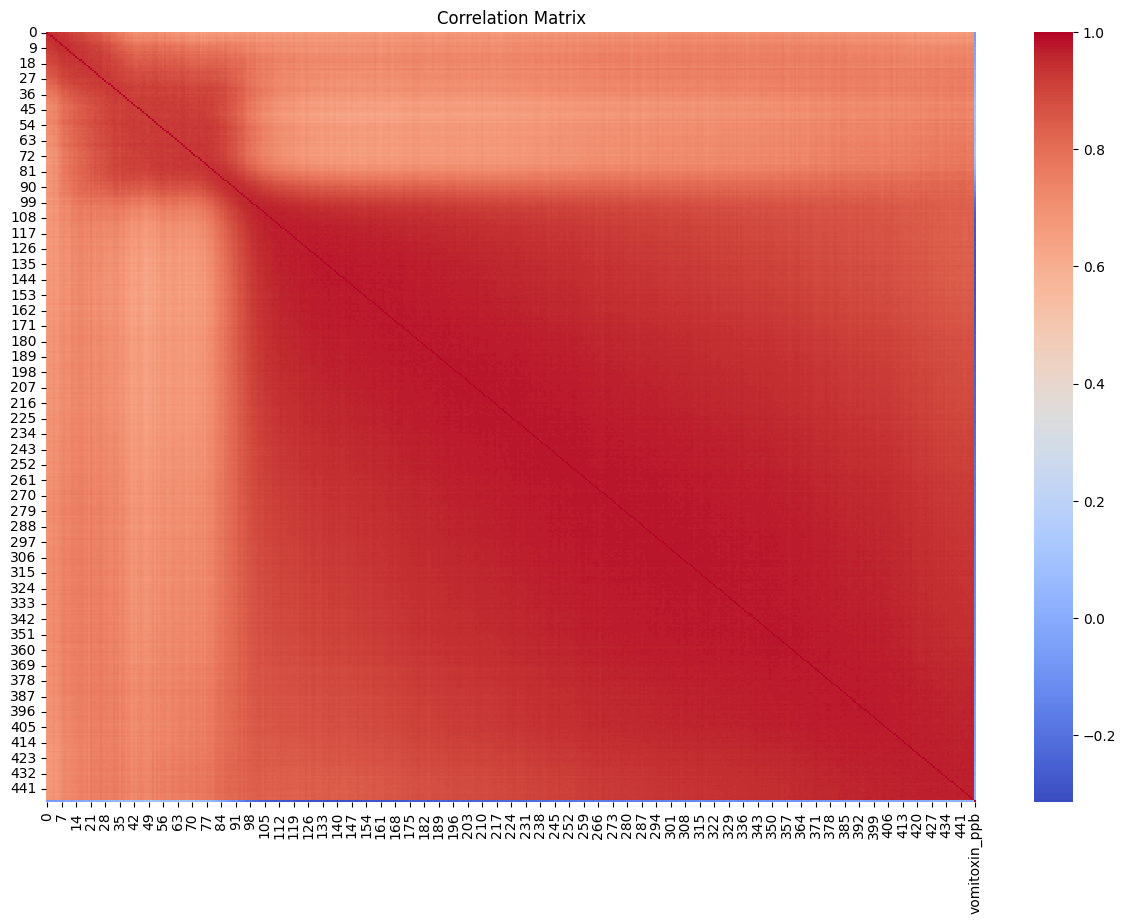

In [66]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Plot Type: Heatmap  
Description:  
This heatmap visualizes the correlation coefficients between different features in the dataset.  
The color gradient represents the correlation strength, with red indicating high positive correlation and blue indicating negative correlation.  
The strong red diagonal suggests that the features are highly correlated with themselves, while other dark red areas indicate strong relationships between specific features.  
This helps identify multicollinearity in the dataset.

In [13]:
# Outlier Removal using IQR
Q1 = df.quantile(0.25)  # First quartile
Q3 = df.quantile(0.75)  # Third quartile
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove Outliers
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print(f"Shape after outlier removal: {df_cleaned.shape}")

Shape after outlier removal: (388, 449)


In [15]:
# Target variable
target = "vomitoxin_ppb"
X = df_cleaned.drop(columns=[target])
y = df_cleaned[target]

# 1️⃣ Check skewness & Apply Log Transformation if needed
if y.skew() > 1 or y.skew() < -1:
    y = np.log1p(y)  # Apply log(1 + y)

In [16]:
X.shape # checking the shape

(388, 448)

In [17]:
y.shape # checking the shape

(388,)

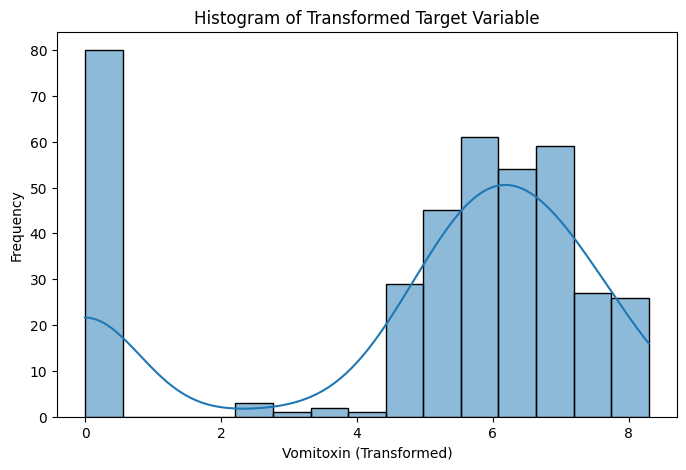

In [19]:
# Visualizing Target Variable Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True)
plt.title('Histogram of Transformed Target Variable')
plt.xlabel("Vomitoxin (Transformed)")
plt.ylabel("Frequency")
plt.show()

Plot Type: Histogram with KDE (Kernel Density Estimation)  
Description:  
This histogram displays the distribution of the transformed vomitoxin variable.  
The x-axis represents the transformed vomitoxin values, while the y-axis represents frequency.  
There is a bimodal distribution, meaning the data has two distinct peaks,
possibly indicating two different groups within the dataset.  
This transformation likely helps normalize the target variable for better model performance.

In [20]:
#mBox-Cox Transformation

from scipy.stats import boxcox
y_boxcox, _ = boxcox(y + 1)  # Adding 1 to handle zeros
print("New Skewness after Box-Cox:", pd.Series(y_boxcox).skew())

New Skewness after Box-Cox: -0.7367322516009023


In [21]:
# Power Transformation (Yeo-Johnson)

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
y_power = pt.fit_transform(y.values.reshape(-1, 1))
print("New Skewness after Power Transformation:", pd.Series(y_power.flatten()).skew())

New Skewness after Power Transformation: -0.7367322778834392


In [22]:
y_power.shape # checking the shape

(388, 1)

In [23]:
y_power = y_power.ravel()  # Converts shape (n_samples, 1) -> (n_samples,)

In [24]:
# Import Necessary Libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_power, test_size=0.2, random_state=42)

In [25]:
# Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
}

In [26]:
# Train & Evaluate Models

results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Compute Evaluation Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R² Score
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

    # Store results
    results.append({"Model": name, "RMSE": rmse, "R²": r2, "MAE": mae})

    # Print Performance
    print(f"✅ {name} -> RMSE: {rmse:.2f}, R²: {r2:.4f}, MAE: {mae:.2f}")

✅ Linear Regression -> RMSE: 1.75, R²: -1.7018, MAE: 1.42
✅ Random Forest -> RMSE: 1.06, R²: 0.0054, MAE: 0.86
✅ XGBoost -> RMSE: 1.11, R²: -0.0939, MAE: 0.93


In [27]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n🔍 Model Performance Comparison:\n", results_df)


🔍 Model Performance Comparison:
                Model      RMSE        R²       MAE
0  Linear Regression  1.750818 -1.701844  1.421094
1      Random Forest  1.062266  0.005408  0.861246
2            XGBoost  1.114059 -0.093943  0.925424


In [29]:
# Remove Low-Variance Features
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold with a low threshold to remove near-constant features
var_thresh = VarianceThreshold(threshold=0.0001)  # 0.01% variance threshold
X_var = var_thresh.fit_transform(X)

# Get feature names that passed the variance threshold
selected_features = X.columns[var_thresh.get_support()]
X = X[selected_features]  # Keep only selected features

print(f"Shape after low-variance feature removal: {X.shape}")

Shape after low-variance feature removal: (388, 448)


In [30]:
# Remove Highly Correlated Features**
import numpy as np

# Compute the absolute correlation matrix
corr_matrix = X.corr().abs()

# Extract the upper triangle of the correlation matrix (to avoid duplicate comparisons)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify highly correlated features (correlation > 0.95)
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

# Drop highly correlated features
X = X.drop(columns=high_corr_features)

print(f"Shape after correlation-based feature selection: {X.shape}")

Shape after correlation-based feature selection: (388, 113)


In [31]:
# Recursive Feature Elimination (RFE)**
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Initialize a RandomForest model for feature selection
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform RFE to select top 50 features
rfe = RFE(model, n_features_to_select=50)
X_rfe = rfe.fit_transform(X, y)

# Retain only the selected features
selected_rfe_features = X.columns[rfe.support_]
X = X[selected_rfe_features]

print(f"Final shape after RFE selection: {X.shape}")

✅ Final shape after RFE selection: (388, 50)


In [32]:
# --- Move to PCA since feature selection is done ---

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [33]:
# Define Features & Target
target = "vomitoxin_ppb"
X = df_cleaned.drop(columns=[target])
y = df_cleaned[target]

In [34]:
X.shape # checking the shape

(388, 448)

In [35]:
y.shape # checking the shape

(388,)

In [36]:
# Standardize Features (PCA requires standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
# Apply PCA
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

In [42]:
# Number of Components Selected
num_components = pca.n_components_
print(f"Number of PCA Components Retained: {num_components}")

Number of PCA Components Retained: 20


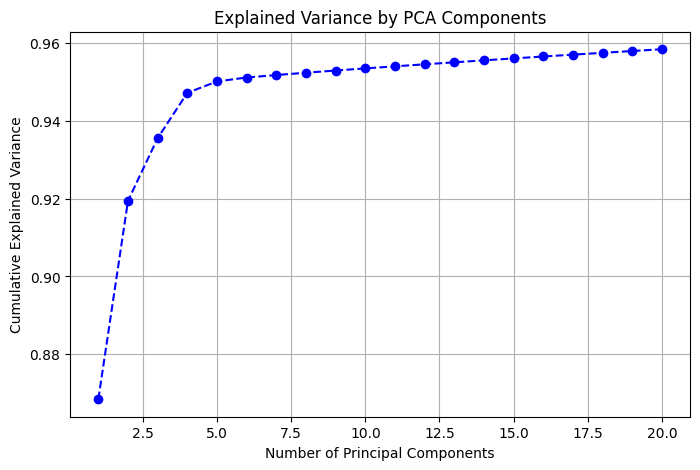

In [43]:
# Visualizing Explained Variance**
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_components + 1), np.cumsum(pca.explained_variance_ratio_),
         marker="o", linestyle="--", color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()

Plot Type: Line Plot  
Description:  
This plot shows the cumulative explained variance of the dataset as the number of principal components increases.  
The x-axis represents the number of principal components, while the y-axis represents the cumulative explained variance.  
The curve rises steeply initially and then flattens out, indicating that the first few components explain most of the variance in the data.  
This is useful for determining how many principal components are needed for dimensionality reduction.

In [44]:
# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [46]:
# Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
}

In [49]:
# Train & Evaluate Models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({"Model": name, "RMSE": rmse, "R²": r2, "MAE": mae})
    print(f"{name} -> RMSE: {rmse:.2f}, R²: {r2:.4f}, MAE: {mae:.2f}")

Linear Regression -> RMSE: 726.26, R²: 0.1201, MAE: 537.43
Random Forest -> RMSE: 753.28, R²: 0.0534, MAE: 571.88
XGBoost -> RMSE: 840.80, R²: -0.1794, MAE: 589.41


In [50]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Comparison:\n", results_df)

Model Performance Comparison:
                Model        RMSE        R²         MAE
0  Linear Regression  726.259273  0.120065  537.428372
1      Random Forest  753.283897  0.053361  571.880128
2            XGBoost  840.800982 -0.179379  589.414942


In [51]:
# Define Hyperparameter Grids

from sklearn.model_selection import RandomizedSearchCV

param_grids = {
    "random_forest": {
        "n_estimators": [100, 200, 300, 500],
        "max_depth": [10, 20, 30, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "xgboost": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 6, 10],
        "learning_rate": [0.01, 0.05, 0.1, 0.2],
        "subsample": [0.6, 0.8, 1.0]
    }
}

# Define Models
models = {
    "random_forest": RandomForestRegressor(random_state=42),
    "xgboost": XGBRegressor(objective="reg:squarederror", random_state=42)
}

# Perform Randomized Search
best_models = {}
for model_name, model in models.items():
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_iter=10,  # 🔹 Faster search
        cv=3,
        scoring="r2",
        n_jobs=-1,
        random_state=42
    )
    search.fit(X_train, y_train)
    best_models[model_name] = search.best_estimator_

# Save Best Models
rf_best = best_models["random_forest"]
xgb_best = best_models["xgboost"]

In [52]:
from sklearn.metrics import r2_score

# Make Predictions
y_pred_rf = rf_best.predict(X_test)
y_pred_xgb = xgb_best.predict(X_test)

# Print Best Hyperparameters & Performance
print("Best Random Forest Params:", rf_best.get_params())
print("Best RF R² Score:", r2_score(y_test, y_pred_rf))

print("Best XGBoost Params:", xgb_best.get_params())
print("Best XGB R² Score:", r2_score(y_test, y_pred_xgb))


Best Random Forest Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Best RF R² Score: 0.06935658627577101
Best XGBoost Params: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, '

In [54]:
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score

# Define base models
base_models = [
    ("rf", rf_best),  # Best Random Forest Model
    ("xgb", xgb_best)  # Best XGBoost Model
]

# Stacking Regressor (meta-model: XGBoost)
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=XGBRegressor(objective="reg:squarederror", random_state=42),
    n_jobs=-1
)
stacked_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stacked_model.predict(X_test)
stacked_r2 = r2_score(y_test, y_pred_stack)
print(f"Stacked Model R² Score: {stacked_r2:.4f}")

Stacked Model R² Score: -0.1827


In [55]:
# Calculate XGBoost R² Score
y_pred_xgb = xgb_best.predict(X_test)
xgb_r2 = r2_score(y_test, y_pred_xgb)

# Compare Stacked Model vs. Best XGBoost Model
best_model_name, best_model = ("XGBoost", xgb_best) if xgb_r2 >= stacked_r2 else ("Stacking (XGB+RF)", stacked_model)

print(f"Best Model: {best_model_name} with R² Score: {r2_score(y_test, best_model.predict(X_test)):.4f}")

# # Save the Best Model
# import pickle

# with open("best_model.pkl", "wb") as f:
#     pickle.dump(best_model, f)

# print("Model saved as best_model.pkl")

Best Model: XGBoost with R² Score: -0.0871


Model is not good as seen with the R^2 score

In [56]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    # Predictions
    y_pred = model.predict(X_test)

    # Regression Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print Evaluation Results
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

    # Scatter Plot (Actual vs. Predicted)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor="black")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", linewidth=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs. Predicted ({model_name})")
    plt.show()

    return {"MAE": mae, "RMSE": rmse, "R²": r2}

XGBoost Performance:
Mean Absolute Error (MAE): 588.4680
Root Mean Squared Error (RMSE): 807.2492
R² Score: -0.0871



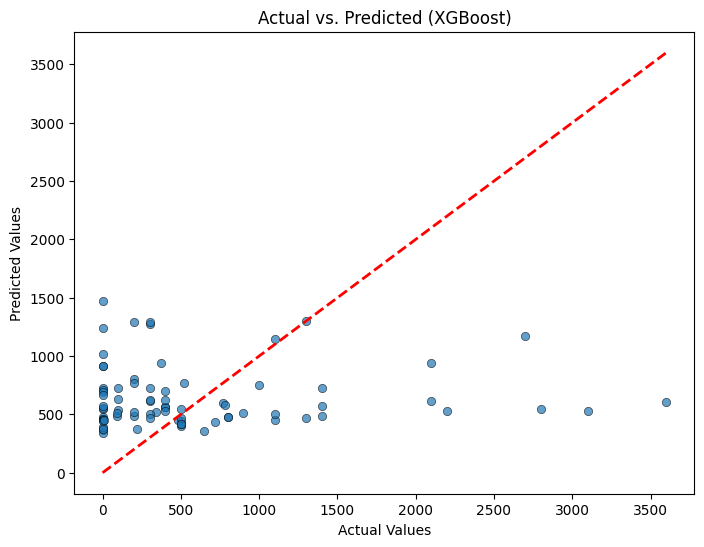

In [57]:
# Evaluate XGBoost
xgb_results = evaluate_model(xgb_best, X_test, y_test, "XGBoost")

Purpose: Another actual vs. predicted values scatter plot for a different dataset or model.  
Key Observations:  
Many predicted values are clustered towards lower actual values, suggesting that the model might be underestimating for higher values.  
Some points are widely scattered from the diagonal line, indicating prediction errors and potential improvements needed in model tuning.

In [58]:
# model is not performing well, so will try using PCA with original dataframe

In [59]:
# Load Preprocessed Data
df_1 = pd.read_csv('/content/TASK-ML-INTERN.csv')

In [60]:
df_1.drop('hsi_id', axis = 1, inplace = True)

In [61]:
# Define Features & Target
target = "vomitoxin_ppb"
X = df.drop(columns=[target])
y = df[target]

In [62]:
# Standardize Features (PCA requires standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
# Apply PCA
pca = PCA(n_components=0.97)  # Retain 97% variance
X_pca = pca.fit_transform(X_scaled)

In [64]:
# Number of Components Selected
num_components = pca.n_components_
print(f"🔹 Number of PCA Components Retained: {num_components}")

🔹 Number of PCA Components Retained: 22


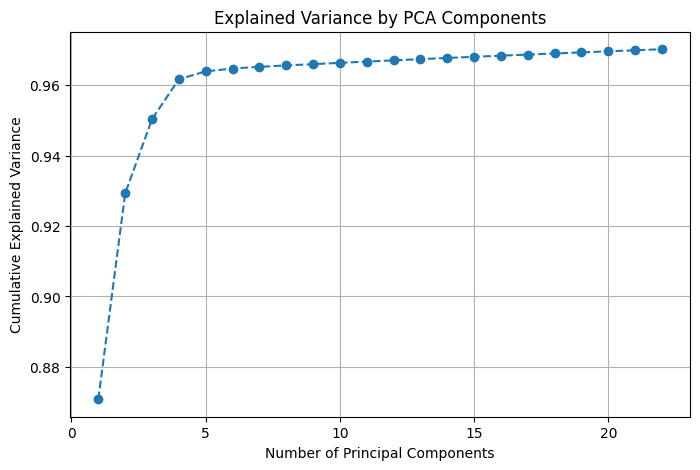

In [65]:
# Visualize Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_components+1), np.cumsum(pca.explained_variance_ratio_), marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()

Purpose: This plot shows the cumulative explained variance by the number of principal components.  
Key Observations:  
The first few components capture most of the variance (about 95% within 5 components), indicating that dimensionality reduction is effective.  
The curve flattens after a certain number of components, meaning adding more components doesn’t contribute significantly to the variance explained.

In [68]:
# Save both PCA and Scaler

import pickle

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

with open("pca_model.pkl", "wb") as pca_file:
    pickle.dump(pca, pca_file)

print("PCA and Scaler saved successfully!")

PCA and Scaler saved successfully!


In [69]:
# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [71]:
# Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
}

In [74]:
# Train & Evaluate Models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({"Model": name, "RMSE": rmse, "R²": r2, "MAE": mae})
    print(f"{name} -> RMSE: {rmse:.2f}, R²: {r2:.4f}, MAE: {mae:.2f}")

Linear Regression -> RMSE: 10376.65, R²: 0.5111, MAE: 4618.28
Random Forest -> RMSE: 6693.16, R²: 0.7966, MAE: 2635.68
XGBoost -> RMSE: 2674.22, R²: 0.9675, MAE: 1523.81


In [75]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Comparison:\n", results_df)

Model Performance Comparison:
                Model          RMSE        R²          MAE
0  Linear Regression  10376.650251  0.511122  4618.280669
1      Random Forest   6693.159649  0.796601  2635.682400
2            XGBoost   2674.223685  0.967530  1523.812139


In [76]:
# Define Hyperparameter Grids

from sklearn.model_selection import RandomizedSearchCV

param_grids = {
    "random_forest": {
        "n_estimators": [100, 200, 300, 500],
        "max_depth": [10, 20, 30, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "xgboost": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 6, 10],
        "learning_rate": [0.01, 0.05, 0.1, 0.2],
        "subsample": [0.6, 0.8, 1.0]
    }
}

# Define Models
models = {
    "random_forest": RandomForestRegressor(random_state=42),
    "xgboost": XGBRegressor(objective="reg:squarederror", random_state=42)
}

# Perform Randomized Search
best_models = {}
for model_name, model in models.items():
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_iter=10,  # 🔹 Faster search
        cv=3,
        scoring="r2",
        n_jobs=-1,
        random_state=42
    )
    search.fit(X_train, y_train)
    best_models[model_name] = search.best_estimator_

# Save Best Models
rf_best = best_models["random_forest"]
xgb_best = best_models["xgboost"]

In [77]:
from sklearn.metrics import r2_score

# Make Predictions
y_pred_rf = rf_best.predict(X_test)
y_pred_xgb = xgb_best.predict(X_test)

# Print Best Hyperparameters & Performance
print("Best Random Forest Params:", rf_best.get_params())
print("Best RF R² Score:", r2_score(y_test, y_pred_rf))

print("\n Best XGBoost Params:", xgb_best.get_params())
print("Best XGB R² Score:", r2_score(y_test, y_pred_xgb))


Best Random Forest Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Best RF R² Score: 0.7609480277768857

 Best XGBoost Params: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10,

In [78]:
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score

# Define base models
base_models = [
    ("rf", rf_best),  # Best Random Forest Model
    ("xgb", xgb_best)  # Best XGBoost Model
]

# Stacking Regressor (meta-model: XGBoost)
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=XGBRegressor(objective="reg:squarederror", random_state=42),
    n_jobs=-1
)
stacked_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stacked_model.predict(X_test)
stacked_r2 = r2_score(y_test, y_pred_stack)
print(f"Stacked Model R² Score: {stacked_r2:.4f}")

Stacked Model R² Score: 0.9199


In [79]:
# Calculate XGBoost R² Score (since it was missing)
y_pred_xgb = xgb_best.predict(X_test)
xgb_r2 = r2_score(y_test, y_pred_xgb)

# Compare Stacked Model vs. Best XGBoost Model
best_model_name, best_model = ("XGBoost", xgb_best) if xgb_r2 >= stacked_r2 else ("Stacking (XGB+RF)", stacked_model)

print(f"Best Model: {best_model_name} with R² Score: {r2_score(y_test, best_model.predict(X_test)):.4f}")

Best Model: XGBoost with R² Score: 0.9455


In [80]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    # Predictions
    y_pred = model.predict(X_test)

    # Regression Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print Evaluation Results
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

    # Scatter Plot (Actual vs. Predicted)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor="black")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", linewidth=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs. Predicted ({model_name})")
    plt.show()

    return {"MAE": mae, "RMSE": rmse, "R²": r2}

XGBoost Performance:
Mean Absolute Error (MAE): 1842.8158
Root Mean Squared Error (RMSE): 3464.8654
R² Score: 0.9455



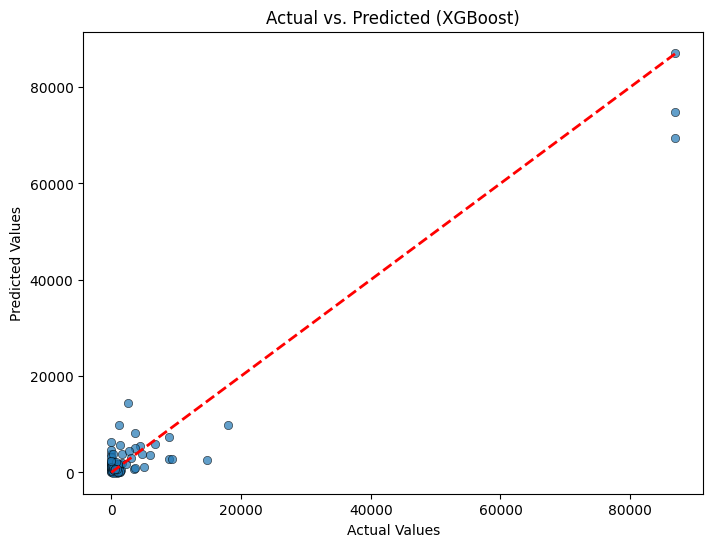

In [81]:
# Evaluate XGBoost
xgb_results = evaluate_model(xgb_best, X_test, y_test, "XGBoost")

Purpose: A scatter plot comparing actual vs. predicted values, with a red dashed diagonal line indicating a perfect prediction.  
Key Observations:  
Points falling close to the red diagonal line indicate good predictions.  
Some points deviate significantly, suggesting the presence of outliers or prediction errors.  
The model seems to struggle with higher values, as seen in the scattered points far from the line.

In [82]:
import xgboost as xgb

# Save XGBoost model
xgb_best.save_model("xgb_model.json")

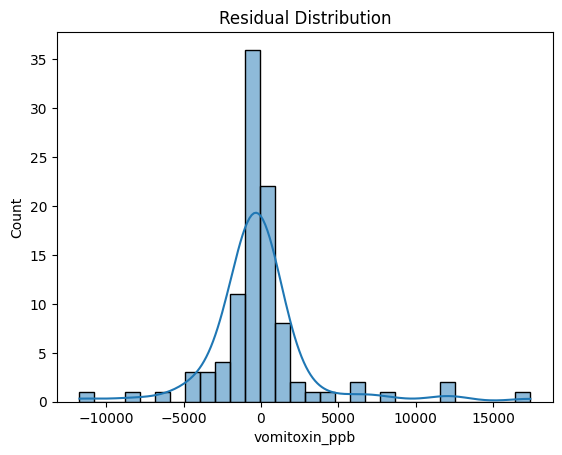

In [83]:
residuals = y_test - xgb_best.predict(X_test)
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.show()

Purpose: This histogram visualizes the distribution of residuals (differences between actual and predicted values).  
Key Observations:  
The residuals appear to be centered around zero, indicating that the model does
not have a strong bias.  
The presence of long tails suggests that there might be some extreme prediction errors.  
The distribution is slightly skewed, meaning the model might be overestimating or underestimating some values.